<a href="https://colab.research.google.com/github/hdpark1208/StudyCode/blob/main/Algorithm/PG/%EC%96%91%EA%B6%81_%EB%8C%80%ED%9A%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 양궁 대회

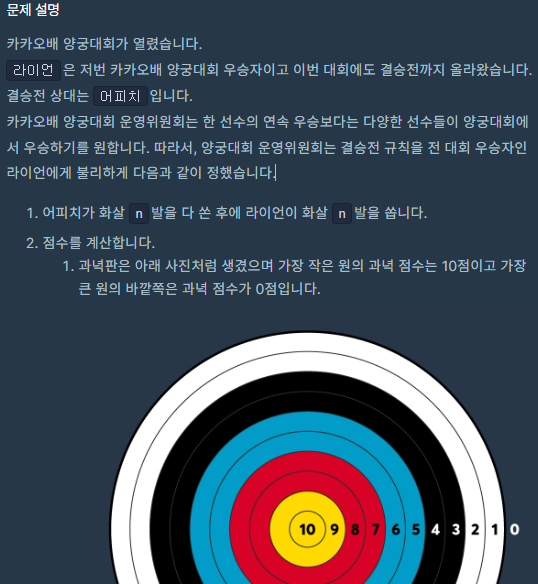

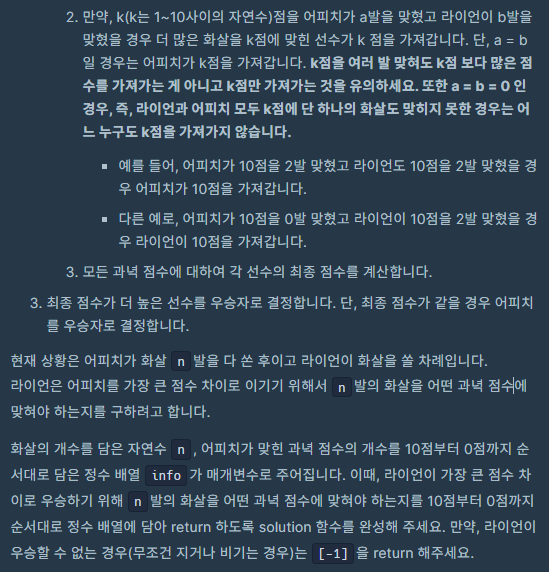

## 입력 출력 및 예제


* 입력

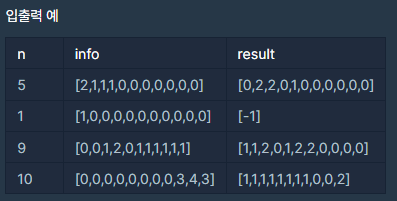

* 출력

* 예제

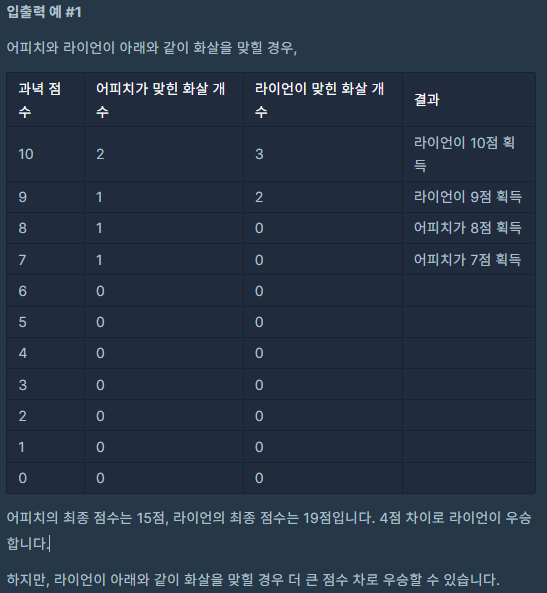

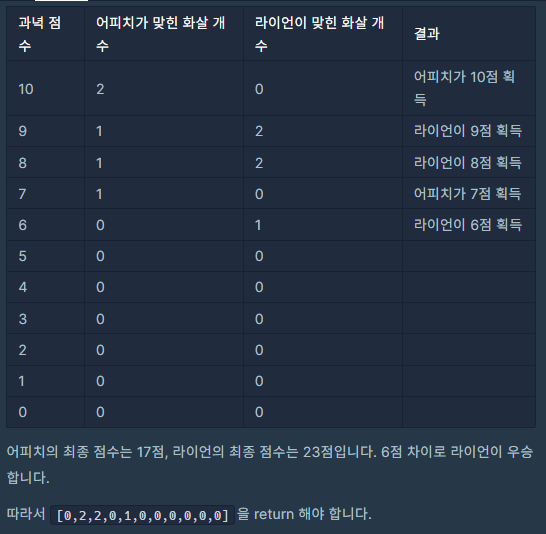

## 구상

- 전체 경우를 다 생각하기엔 n이 커짐에 따라 11 ^ n 의 비용이므로 안된다.
- 점수 산출 방식은 고정 되어있으니, 각 포인트마다 기대값을 만들어 n을 분배해보자

## 코드

In [ ]:
# 실패
def solution(n, info):
    answer = []
    return answer

def expectation(info):
    result = []
    for i in range(11):
        point = 10 - i
        arrow = info[i]
        if arrow != 0:
            E = round(point / (arrow + 1), 3) * 2 # 적당히 소수점 3자리에서 반올림
        else:
            E = round(point / (arrow + 1), 3)
        result.append([E, arrow + 1])

    return result


In [5]:
round(3/4,3)

0.75

In [ ]:
def solution(n, info):
    max_diff = -1  # 가장 큰 점수 차
    answer = [-1]  # 정답 화살 분배 (없으면 -1)

    def dfs(idx, arrows_left, lion_shot):
        nonlocal max_diff, answer

        # 11개의 점수 구간 모두 탐색했을 때
        if idx == 11:
            # 남은 화살이 있다면 0점(가장 낮은 점수)에 몰아준다
            if arrows_left > 0:
                lion_shot[10] += arrows_left

            # 점수 계산
            lion_score, apeach_score = 0, 0
            for i in range(11):
                if lion_shot[i] == 0 and info[i] == 0:
                    continue  # 둘 다 못 맞춘 경우는 점수 없음
                if lion_shot[i] > info[i]:
                    lion_score += 10 - i
                else:
                    apeach_score += 10 - i

            diff = lion_score - apeach_score

            # 라이언이 이긴 경우만 처리
            if diff > 0:
                if diff > max_diff:
                    max_diff = diff
                    answer = lion_shot[:]  # 깊은 복사로 저장
                elif diff == max_diff:
                    # 점수 차가 같으면 더 낮은 점수를 더 많이 맞힌 경우 선택
                    for i in reversed(range(11)):
                        if lion_shot[i] > answer[i]:
                            answer = lion_shot[:]
                            break
                        elif lion_shot[i] < answer[i]:
                            break

            # 나중을 위해 남은 화살 되돌리기
            if arrows_left > 0:
                lion_shot[10] -= arrows_left
            return

        # 선택 1: 이 점수를 먹는다 (어피치보다 1발 더 쏘기)
        needed = info[idx] + 1
        if arrows_left >= needed:
            lion_shot[idx] = needed
            dfs(idx + 1, arrows_left - needed, lion_shot)
            lion_shot[idx] = 0  # 백트래킹: 원상복구

        # 선택 2: 이 점수를 포기 (아무 화살도 안 쏨)
        dfs(idx + 1, arrows_left, lion_shot)

    # DFS 시작
    dfs(0, n, [0] * 11)
    return answer


In [17]:
n = 10
i =	[0,0,0,0,0,0,0,0,3,4,3]

In [18]:
expectation(i)

[[10.0, 1],
 [9.0, 1],
 [8.0, 1],
 [7.0, 1],
 [6.0, 1],
 [5.0, 1],
 [4.0, 1],
 [3.0, 1],
 [1.0, 4],
 [0.4, 5],
 [0.0, 4]]

### 메모

* 카카오 lv2는 아직 너무 어렵다...